<a href="https://colab.research.google.com/github/juangross/clasificador/blob/main/nvdi_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo**
Implementar un script que permita abrir una imagen multibanda recortada y calcular el índice nvdi.

bloque 1 - descarga de imágenes

In [1]:
#@title Importar el material de trabajo

#importo material de trabajo, si ya existe lo borro

print ("Importando desde github:")
!rm -r ./img
!git clone https://github.com/juangross/img



Importando desde github:
rm: cannot remove './img': No such file or directory
Cloning into 'img'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [2]:
#@title funciones básicas
#@title
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.colors
import imageio as img
import numpy as np
#from scipy import fftpack
#import fnmatch
import os
import sys

#imprimo las versiones de las librerías que voy usando
print('Librerías usadas')
print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(mplt.__version__))
print('imageio: {}'.format(img.__version__))
print('numpy: {}'.format(np.__version__))


#transformo a 
def RGB_TO_YIQ(RGBImage ):
  #matriz de conversión de RGB -> YIQ
  RGB2YIQ=np.array([[0.299,0.587,0.114],
                    [0.595716,-0.274453,-0.321263],
                    [0.211456,-0.522591,0.311135]], dtype=float)

  #me baso en esta explicación del producto matricial para hacer la conversión de bases
  #https://stackoverflow.com/questions/46990838/numpy-transforming-rgb-image-to-yiq-color-space
  YIQ_image=np.zeros(RGBImage.shape, dtype=float)
  YIQ_image=np.dot(RGBImage,RGB2YIQ.T.copy())
  return YIQ_image


def leerIMG(archivo):
  
  #Lee imagen con el formato actual
  #print("leyendo archivo:", f"{path}{archi}.{ext}")
  imagen=(img.imread(f"{path}{archivo}.{ext}"))      #lee con imageio

  #imagen=imagen.astype('float')/255 #normalizo
  #imagen=np.clip(imagen,0.,1.)  #recorto los valores extremos al rango [0:1] 
  print("leyendo archivo:", f"{path}{archi}.{ext}","[dimensiones,canales]", imagen.shape)
  #plt.imshow( imagen)

  #print("valor máximo: ",np.max(imagen))
  return  imagen



def MostrarImg(imagen,titulo,plots,plotn):

  if (len(imagen.shape) >2):
    #la imagen tiene mas de 1 canal.
  #  #img2=imagen.astype('float')//255 #normalizo
  #  #img3=np.clip(img2,0.,1.)  #recorto los valores extremos al rango [0:1] 

    imagen_yiq=RGB_TO_YIQ(imagen)
  #  #print("Canales: ", imagen_yiq.shape)
    img=imagen_yiq[:,:,0]

  else:
  #tiene un sólo canal
    img=imagen

  #print("valor máximo: ",np.max(img))
  #plt.title("Imagen original")
  #plt.imshow( imagen.astype('uint8') )
  #en img queda definida la imagen a trabajar para la proxima función
  print("valor máximo: ",np.max(img))  
  #plt.title(titulo)
  #plt.imshow( imagen.astype('uint8') )
  #fig, axs = plt.subplots(1, plots, tight_layout=False,figsize=(16,16))
  fig, axs = plt.subplots(1, plots, tight_layout=False)
  axs[plotn].imshow(img.astype('uint8'))
  axs[plotn].set_title(titulo)
  
  
  

Librerías usadas
python: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
matplotlib: 3.2.2
imageio: 2.9.0
numpy: 1.21.6


In [3]:
#@title listar imagenes en el repositorio
# import OS module
import os
 
# Get the list of all files and directories
path = "./img"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
 
# prints all files
print(dir_list)


Files and directories in ' ./img ' :
['T21JXK_20220420T134209_B8A_20m_rec2.tif', 'T21JXK_20220420T134209_TCI_10m_rec.tif', 'T21JXK_20220420T134209_B08_10m_rec.tif', 'T21JXK_20220420T134209_B05_20m_rec2.tif', 'README.md', 'T21JXK_20220420T134209_B04_20m_rec2.tif', '.git', 'T21JXK_20220420T134209_B04_10m_rec.tif', 'T21JXK_20220420T134209_B06_20m_rec2.tif', 'T21JXK_20220420T134209_B03_20m_rec2.tif', 'T21JXK_20220420T134209_TCI_20m_rec2.tif']


leyendo archivo: ./img/T21JXK_20220420T134209_TCI_10m_rec.tif [dimensiones,canales] (668, 1388, 3)
min: 2
max: 255
leyendo archivo: ./img/T21JXK_20220420T134209_B04_10m_rec.tif [dimensiones,canales] (668, 1388)
min: 1025
max: 8896
leyendo archivo: ./img/T21JXK_20220420T134209_B08_10m_rec.tif [dimensiones,canales] (668, 1388)
min: 1191
max: 9121


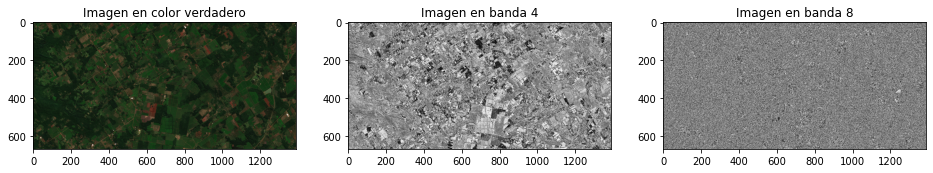

In [7]:
#@title Mostrar el set imágenes de entrada
#listado de imagenes disponibles por el momento
#[T21JXK_20220420T134209_B04_20m_rec2.tif', 
#'T21JXK_20220420T134209_B8A_20m_rec2.tif', 
#'T21JXK_20220420T134209_B03_20m_rec2.tif', 
#'T21JXK_20220420T134209_TCI_20m_rec2.tif',
#'README.md', \
#'T21JXK_20220420T134209_B05_20m_rec2.tif',
#'.git', 
#'T21JXK_20220420T134209_B06_20m_rec2.tif']

#leo las imágenes que necesito y las muestro
fig, axs = plt.subplots(1, 3, tight_layout=False,figsize=(16,16))

ext="tif"

archi="/T21JXK_20220420T134209_TCI_10m_rec"
imagenTCI=leerIMG(archi)
print("min:",np.amin(imagenTCI))
print("max:",np.amax(imagenTCI))
#plt.title("Imagen en color verdadero")
#plt.imshow( imagenTCI.astype('uint8') )
axs[0].imshow(imagenTCI.astype('uint8'))
axs[0].set_title("Imagen en color verdadero")


archi="/T21JXK_20220420T134209_B04_10m_rec"
imagenb4=leerIMG(archi)
print("min:",np.amin(imagenb4))
print("max:",np.amax(imagenb4))

#plt.title("Imagen en banda 4")
#plt.imshow( imagenb4.astype('uint8') )
axs[1].imshow(imagenb4.astype('uint8'),cmap= 'gray')
axs[1].set_title("Imagen en banda 4")


archi="/T21JXK_20220420T134209_B08_10m_rec"
imagenb8=leerIMG(archi)
print("min:",np.amin(imagenb8a))
print("max:",np.amax(imagenb8a))

#plt.title("Imagen en banda 8A")
#plt.imshow( imagenb8a.astype('uint8') )
axs[2].imshow(imagenb8.astype('uint8'),cmap= 'gray')
axs[2].set_title("Imagen en banda 8")

plt.show()


min: 0.0
max: 26.62129215765949


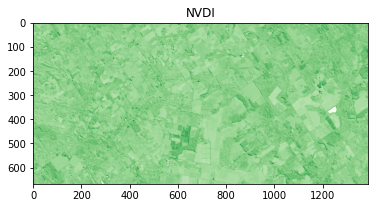

In [14]:
#@title Calculo de NVDI
nvdi = (imagenb4 - imagenb8) / (imagenb4 + imagenb8) 

plt.title("NVDI")
plt.imshow( nvdi.astype('uint8') ,cmap= 'Greens')
print("min:",np.amin(nvdi))
print("max:",np.amax(nvdi))

#colores = matplotlib.colors.ListedColormap(["#000000", "#888888", "#AAAAAA", "#FFFFFF"])
#plt.imshow( nvdi.astype('uint8') ,cmap= colores)
# 0.1-0.4
#ubicar lotes
#pasos siguientes
#hacer contraste de imagenes